# 📊 Instacart Customer Ordering Behavior Analysis

### Exploratory Data Analysis

---

> **Objective:** Analyze customer purchasing behavior to uncover ordering patterns, reorder trends, and demand timing insights that support business decision-making.

---


## Executive Summary

**Key Insights**

- 🕒 Peak demand occurs between **9 AM – 5 PM**, with highest activity at 10 AM and 3 PM.
- 📅 **Sunday and Monday** show the highest order volumes.
- 🔁 The most common reorder interval is **7 days**, indicating strong weekly purchasing behavior.
- 🛒 Typical basket size is **5–6 items**, with most orders under 20 items.
- 🥬 Fresh produce and dairy dominate reorder frequency, suggesting strong category stickiness.
- 📆 A spike at 30 days likely reflects subscription behavior or dataset constraints.

---

## Importing the required libraries

In [ ]:
# The libraries needed for this analysis
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the datasets (dataset is not included on github due to privacy reasons)
orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

## Analyze your data

In [ ]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
products.isnull().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [ ]:
# show_counts=True since this is a large file.
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


### `products` Data Frame

We begin by addressing the missing values in the `products` data frame.

In [ ]:
# Display rows where the product_name column has missing values

products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


It seems suspicious that all rows with missing `product_name` might be associated with `aisle_id` 100 and `department_id` 21. Let’s verify this by checking if any rows with missing `product_name` have an `aisle_id` different from 100 and 21. This will help us confirm if the issue is isolated to this aisle or spread across others.

In [ ]:
# Combine conditions to check for missing product names in aisles other than 100
products[(products['product_name'].isna()) & (products['aisle_id'] != 100)]


,product_id,product_name,aisle_id,department_id


In [ ]:
# Combine conditions to check for missing product names in aisles other than 21
products[(products['product_name'].isna()) & (products['aisle_id'] != 21)]


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


To better understand the missing product_name values, let’s determine what department_id 21 and aisle_id 100 represent by referencing the departments and aisles tables.

In [ ]:
# What is this aisle and department?
print(aisles[aisles['aisle_id']==100])
print(departments[departments['department_id']==21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


In [ ]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')


### `orders` data frame

Now let's fill in missing values from the `orders` table.

In [ ]:
# Display rows where the days_since_prior_order column has missing values
orders[orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


All of the missing `'days_since_prior_order'` values correspond to a customer's first ever order. This makes sense because there is no prior order! We'll leave the values as `NaN` so the column can remain numeric. Also, the `NaN` values shouldn't interfere with any calculations we might do using this column.

### `order_products` data frame

Now let's fill in missing values from the order_products table.

In [ ]:
# Display rows where the add_to_cart_order column has missing values
order_products[order_products['add_to_cart_order'].isna()].head()

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1


In [ ]:
print(order_products['add_to_cart_order'].min(), order_products['add_to_cart_order'].max())

1.0 64.0


In [ ]:
order_ids_with_missing_add_to_cart = order_products.loc[order_products['add_to_cart_order'].isna(),
    'order_id'].unique()

In [ ]:
order_sizes = order_products.groupby('order_id')['product_id'].count()
sizes_for_missing = order_sizes.loc[order_ids_with_missing_add_to_cart]
print("Min number:", sizes_for_missing.min())
print("Max number:", sizes_for_missing.max())
#yes

Min number: 65
Max number: 127


In [ ]:
# Replacing missing values with 999 and converting column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)
print(order_products['add_to_cart_order'].isna().sum())
print(order_products['add_to_cart_order'].dtype)

0
int64


Missing add_to_cart_order values occurred exclusively for items beyond position 64, likely reflecting a system-imposed limit. These were encoded as 999 to preserve numeric integrity while flagging unknown placement.

Other sensible code values we could've used are 0 or -1 because they don't show up elsewhere in the dataset and they don't have any real physical meaning for this variable.

Also note that, for orders with exactly 65 items, we could replace the missing value with 65. But we're going to neglect that for now since we can't determine the 65th item for all orders with 66 items or more.

## Find and Remove Duplicate Values from All the Datasets

Each dataset may contain duplicate rows, which can lead to redundancy and affect the accuracy of our analysis.

### `orders` data frame

In [ ]:
# Number of duplicate rows in the orders dataframe
print("Number of duplicate rows in orders:", orders.duplicated().sum())

Number of duplicate rows in orders: 15


In [ ]:
# View the duplicate rows
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [ ]:
# Removing duplicate orders
orders = orders.drop_duplicates().reset_index(drop=True)

In [ ]:
# Double checking
print(orders.duplicated().sum())

0


In [ ]:
# Fully duplicated rows
print(products.duplicated().sum())


0


In [ ]:
# Duplicated product IDs
print( products.duplicated(subset='product_id').sum())


0


In [ ]:
# Duplicated product names
print(products['product_name'].str.lower().duplicated().sum())

1361


Let's see what that looks like in the dataset :

In [ ]:
products[products['product_name'].str.lower() == 'high performance energy drink']

,product_id,product_name,aisle_id,department_id
22540,22541,High Performance Energy Drink,64,7
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7


In [ ]:
# Dropping duplicate product names
products['product_name_lower'] = products['product_name'].str.lower()
products = products.drop_duplicates(subset='product_name_lower', keep='first').reset_index(drop=True)
products = products.drop(columns='product_name_lower')
print(products['product_name'].str.lower().duplicated().sum())

0


### `departments` data frame

In [ ]:
# Checking for duplicate entries in the departments dataframe
print(departments.duplicated().sum())


0


### `aisles` data frame

In [ ]:
# Checking for aisles entries in the departments dataframe
print(aisles.duplicated().sum())

0


### `order_products` data frame

In [ ]:
# Checking for duplicate entries in the order_products dataframe
print(order_products.duplicated().sum())

0


We have now successfully cleaned our data. We can begin our exploratory data analysis.

### Consumer Order Timing Analysis


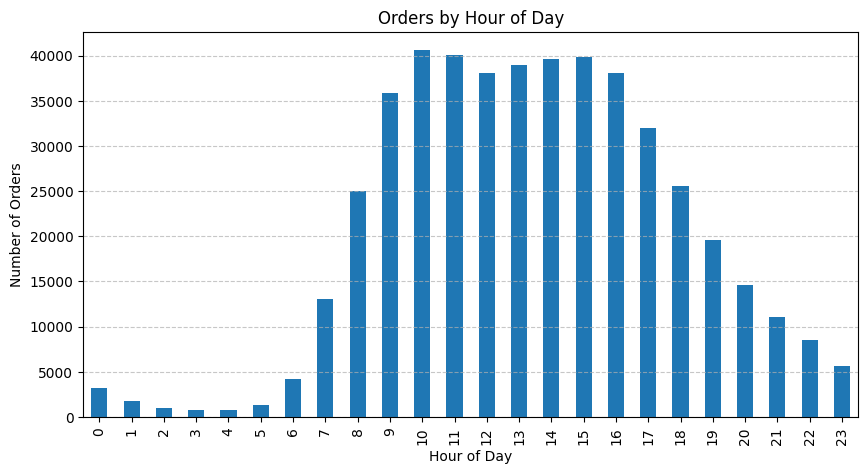

In [ ]:
import matplotlib.pyplot as plt

hourly_orders = orders['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(10,5))
hourly_orders.plot(kind='bar')
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most orders occur between 9:00 AM and 5:00 PM, with peaks at 10:00 AM and 3:00 PM

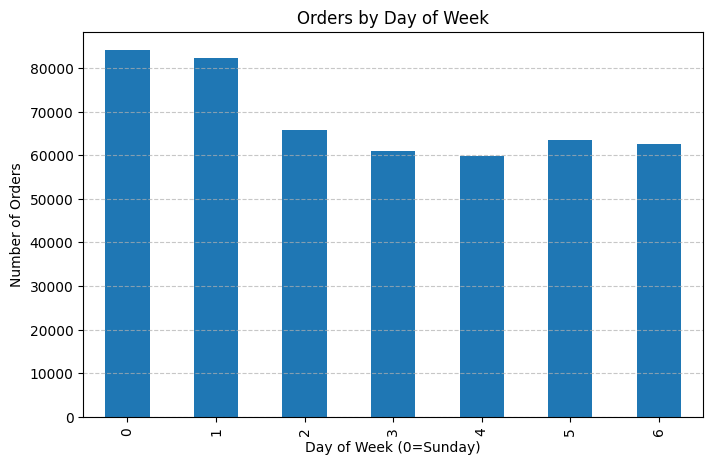

In [ ]:
dow_orders = orders['order_dow'].value_counts().sort_index()

plt.figure(figsize=(8,5))
dow_orders.plot(kind='bar')
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week (0=Sunday)')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The data dictionary does not state which integer corresponds to which day of the week. Assuming Sunday = 0, then people place more orders at the beginning of the week (Sunday and Monday).

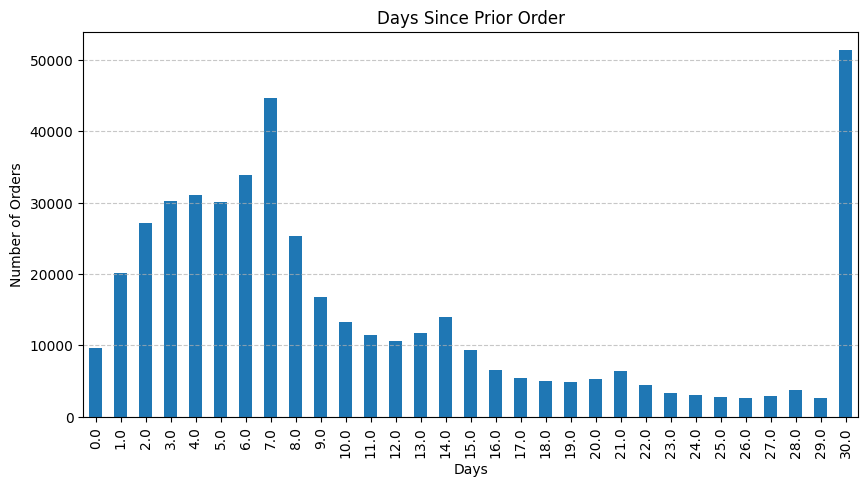

In [ ]:
days_between = orders['days_since_prior_order'].value_counts().sort_index()

plt.figure(figsize=(10,5))
days_between.plot(kind='bar')
plt.title('Days Since Prior Order')
plt.xlabel('Days')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The 0 values probably correspond to customers who placed more than one order on the same day.

The max value of 30 days and the high spike at that value is puzzling though. The spike might be explained by people who set up recurring subscriptions to automatically order once a month. But that doesn't explain why there are no values above 30 days. I would expect many customers to place orders less often than once a month. Maybe those customers were intentionally excluded from the dataset.

Disregarding the spike at 30 days, most people wait between 2 to 10 days in between orders. The most common wait time is 7 days. In other words, it's common for people to place weekly grocery orders. Interestingly, in the tail of the distribution we also see small spikes at 14, 21, and 28 days. These would correspond to orders every 2, 3, or 4 weeks.

In [ ]:
wed_orders = orders[orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()

In [ ]:
sat_orders = orders[orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()

In [ ]:
compare_hours = (
    pd.concat([wed_orders, sat_orders], axis=1, keys=['Wednesday', 'Saturday'])
    .fillna(0))

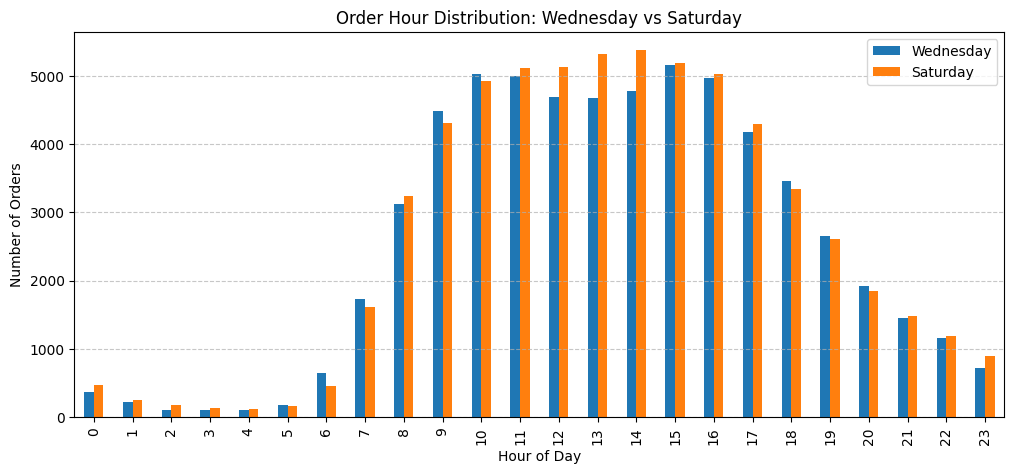

In [ ]:
compare_hours.plot(kind='bar', figsize=(12,5))
plt.title('Order Hour Distribution: Wednesday vs Saturday')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A modest midday dip on Wednesdays may reflect behavioral patterns associated with weekday routines, though further user-level behavioral data would be required to confirm causality.

In [ ]:
orders_per_customer = orders.groupby('user_id')['order_id'].count()

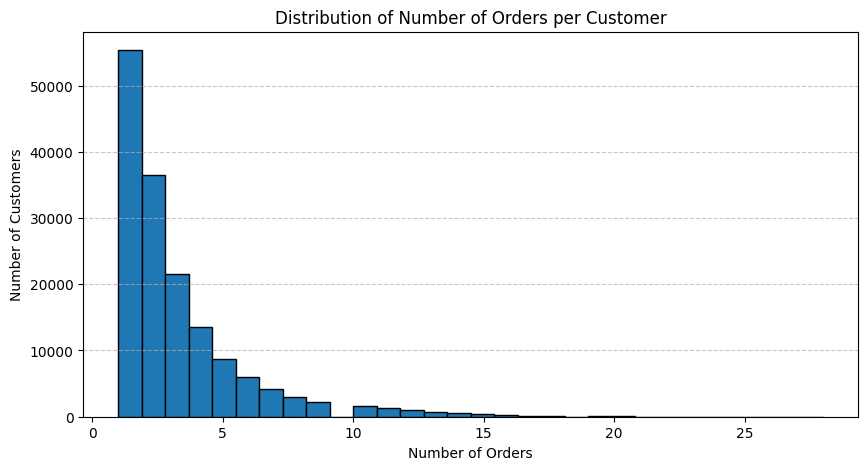

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(orders_per_customer, bins=30, edgecolor='black')
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most customers in the dataset have placed between 1 and 10 orders, with number of orders per customer sharply decreasing after just 1 order.

### Product Demand Analysis

In [ ]:
merged = order_products.merge(products, on='product_id', how='left')

In [ ]:
top_20_products = (
    merged.groupby(['product_id', 'product_name'])
    .size()
    .sort_values(ascending=False)
    .head(20)
    .reset_index(name='order_count'))

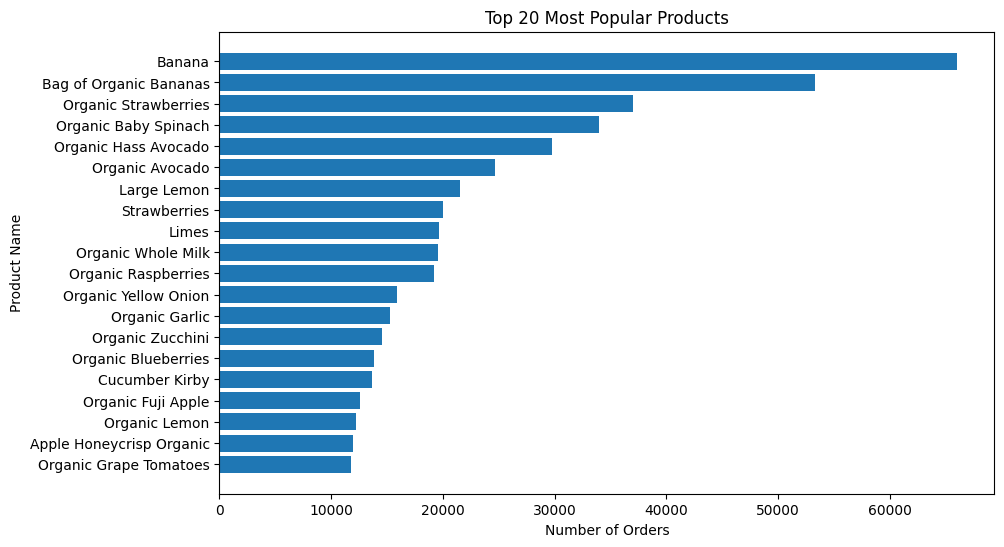

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(top_20_products['product_name'], top_20_products['order_count'])
plt.title('Top 20 Most Popular Products')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.show()

Fresh produce and dairy products dominate order frequency, suggesting strong recurring demand for perishable staple goods.

In [ ]:
order_size = order_products.groupby('order_id')['product_id'].count()

In [ ]:
order_size_distribution = order_size.value_counts().sort_index()

Most of the order numbers are in the tail of the distribution. To get a better look at the non-tail part, let's choose a value in the tail as a threshold and just plot order with fewer than that many items. An order size of 35 items is far enough into the tail for this.

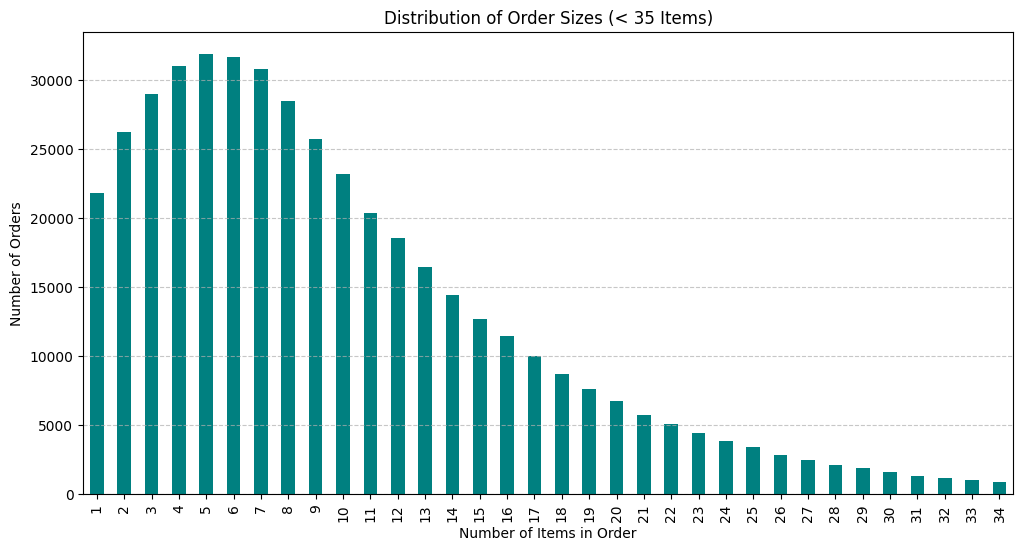

In [ ]:
plt.figure(figsize=(12,6))
order_size_distribution[order_size_distribution.index < 35].plot(kind='bar', color='teal')
plt.title('Distribution of Order Sizes (< 35 Items)')
plt.xlabel('Number of Items in Order')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The typical order contains 5 or 6 items, with most orders having between 1 and 20 items.

In [ ]:
reordered_only = order_products[order_products['reordered'] == 1]

In [ ]:
reordered_merged = reordered_only.merge(products, on='product_id', how='left')

In [ ]:
top_reordered = (
    reordered_merged.groupby(['product_id', 'product_name'])
    .size()
    .sort_values(ascending=False)
    .head(20)
    .reset_index(name='reorder_count'))

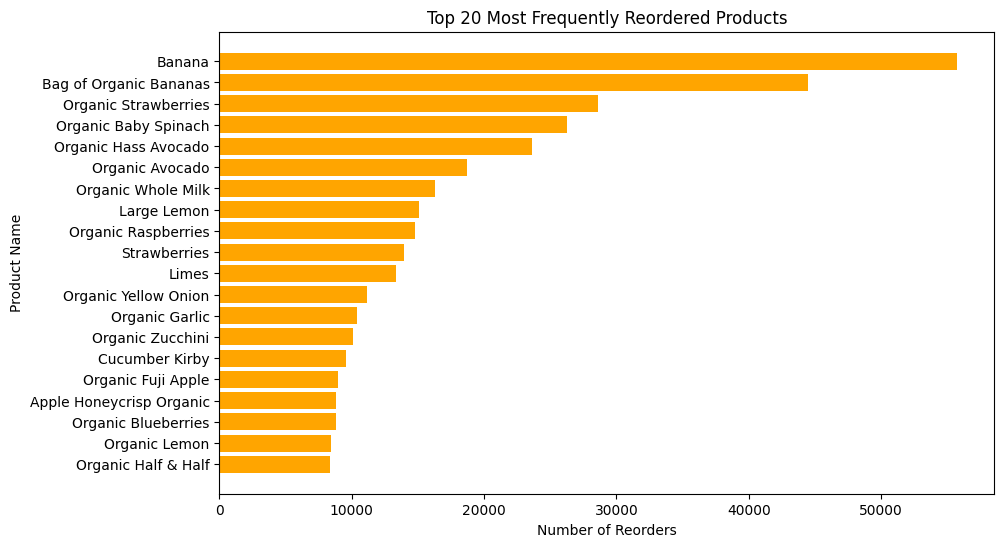

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(top_reordered['product_name'], top_reordered['reorder_count'], color='orange')
plt.title('Top 20 Most Frequently Reordered Products')
plt.xlabel('Number of Reorders')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.show()

It looks like produce and dairy comprise the most reordered products as well. It makes sense that perishables would be the most reordered items.

The products that are most often placed into the cart first are produce, dairy, and beverages such as soda or water. I couldn't really say why that is without experience using Instacart because this could have more to do with app design than properties of the products. I do notice that there is considerable overlap between this result and the previous result for most popular and most reordered item types. It could simply be that the app prioritizes popular items as the first suggested purchases, so it happens to be more convenient for customers to place these items in their cart first.

---
## Strategic Implications

- Midday peak demand suggests operational staffing alignment during 9 AM – 5 PM.
- Weekly reorder cadence supports subscription or reminder-based marketing.
- High reorder rates in produce and dairy indicate strong category loyalty.
- Early-week demand spikes suggest targeted promotional timing opportunities.

---